# Importing Libraries

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [17]:
# Loading Dataset

got_deaths_df = pd.read_csv("../Dataset/character-predictions.csv")

# Exploratory Data Analysis

In [18]:
got_deaths_df.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


### Numerical Exploration

In [19]:
got_deaths_df.shape

(1946, 33)

In [20]:
# Basic Statistics

got_deaths_df.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Data Types

got_deaths_df.dtypes

S.No                   int64
actual                 int64
pred                   int64
alive                float64
plod                 float64
name                  object
title                 object
male                   int64
culture               object
dateOfBirth          float64
DateoFdeath          float64
mother                object
father                object
heir                  object
house                 object
spouse                object
book1                  int64
book2                  int64
book3                  int64
book4                  int64
book5                  int64
isAliveMother        float64
isAliveFather        float64
isAliveHeir          float64
isAliveSpouse        float64
isMarried              int64
isNoble                int64
age                  float64
numDeadRelations       int64
boolDeadRelations      int64
isPopular              int64
popularity           float64
isAlive                int64
dtype: object

In [22]:
# NaN Values

got_deaths_df.isna().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

### Report Generation

### Visual Exploration

In [28]:
# Alive and Dead Pie Charts

dead_alive_dict = {1:"Alive", 0:"Dead"}

# Mapping

got_deaths_df["isAlive_str"] = got_deaths_df["isAlive"].map(dead_alive_dict)

# Pie Chart 

fig = px.pie(got_deaths_df, names="isAlive_str", title="Dead vs. Alive All Characters")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [29]:
# 75% of chracters are alive

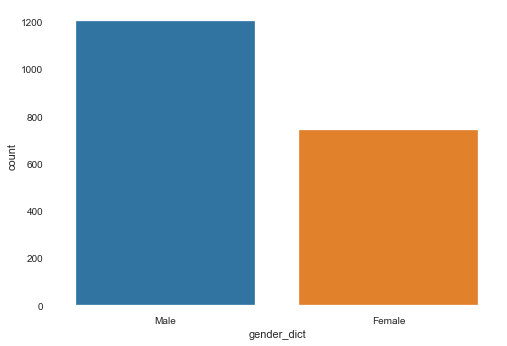

In [38]:
# Gender Based Exploration

gender_dict = {1:"Male", 0:"Female"}
got_deaths_df["gender_dict"] = got_deaths_df["male"].map(gender_dict)
ax = sb.countplot(x="gender_dict", data=got_deaths_df)

In [39]:
# 62% Male and 38% Female 

In [44]:
# Gender of Dead Chracters

dead_df = got_deaths_df[got_deaths_df.isAlive == 0]
alive_df = got_deaths_df[got_deaths_df.isAlive == 1]
fig = px.pie(dead_df, names="gender_dict", title="Gender of Dead Characters")
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()

In [42]:
# More Male Chracters Die


In [45]:
# House Based Exploration
got_deaths_df['houseSize'] = got_deaths_df['house'].map(got_deaths_df['house'].value_counts()) # All Houses Death
got_deaths_df['houseAlive'] = alive_df['house'].map(alive_df['house'].value_counts()) # Alive from Houses
got_deaths_df['houseDead'] = dead_df['house'].map(dead_df['house'].value_counts()) # Dead from houses
got_deaths_df['houseDeathRate'] = got_deaths_df['houseDead']/got_deaths_df['houseSize'] # Dead/Size pf House


In [50]:
sb.catplot("house", col="houseDeathRate", col_wrap=4,
                data=got_deaths_df,
              kind="count", height=2.5, aspect=.8)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



Error in callback <function flush_figures at 0x7fbbf8b2e8b0> (for post_execute):


KeyboardInterrupt: 

# Data Cleaning

In [52]:
# Removing Outliers

got_deaths_df['age'].values[got_deaths_df['age'] == -298001] = 0
got_deaths_df['age'].values[got_deaths_df['age'] == -277980] = 20
got_deaths_df['dateOfBirth'].values[got_deaths_df['dateOfBirth'] == 298299] = 298
got_deaths_df['dateOfBirth'].values[got_deaths_df['dateOfBirth'] == 278279] = 278

In [53]:
got_deaths_df.tail()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,boolDeadRelations,isPopular,popularity,isAlive,isAlive_str,gender_dict,houseSize,houseAlive,houseDead,houseDeathRate
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,0,1,0.351171,0,Dead,Male,72.0,NaN,22.0,0.305556
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,0,0,0.096990,0,Dead,Male,13.0,NaN,4.0,0.307692
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,0,0,0.030100,1,Alive,Male,NaN,NaN,NaN,NaN
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,0,0,0.130435,1,Alive,Male,1.0,1.0,NaN,NaN
1945,1946,0,0,0.093,0.907,Tytos Lannister,Casterly Rock,1,NaN,220.0,...,1,0,0.210702,0,Dead,Male,49.0,NaN,18.0,0.367347


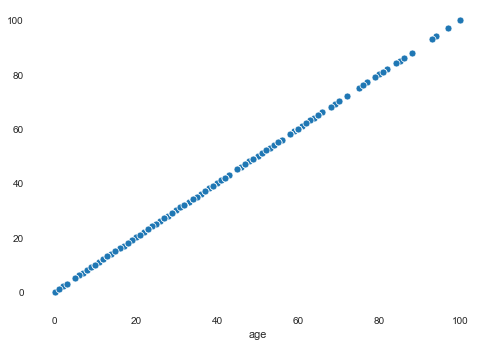

In [55]:
ax = sb.scatterplot(x="age",y=got_deaths_df['age'].values, data=got_deaths_df)

In [56]:
# Imputing Missing Values (By Median)


dob_med = got_deaths_df['dateOfBirth'].median()
got_deaths_df['dateOfBirth'] = got_deaths_df['dateOfBirth'].fillna(dob_med).round(3)
age_med = got_deaths_df['age'].median()
got_deaths_df['age'] = got_deaths_df['age'].fillna(age_med).round(3)



In [57]:
# Imputing Categorical Values

cat_vals =['title', 'culture','mother','father', 'heir', 'house', 'spouse']

for col in got_deaths_df[cat_vals]:
    if got_deaths_df[col].isnull().astype(int).sum() > 0:
        got_deaths_df[col] = got_deaths_df[col].fillna('NULL')

In [58]:
# Null Values

got_deaths_df.isnull().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                   0
male                    0
culture                 0
dateOfBirth             0
DateoFdeath          1502
mother                  0
father                  0
heir                    0
house                   0
spouse                  0
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                     0
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
isAlive_str             0
gender_dict             0
houseSize             427
houseAlive            827
houseDead            1546
houseDeathRa

# Machine Learning